In [1]:
# For working with data
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the Credit Card Fraud Detection dataset (assuming it's in the same directory as this notebook)
file_path = "../data/raw/train.csv"
train_df = pd.read_csv(file_path)

# Display the first few rows of the dataset and general information
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,NaN,26,none,17.0,Basic,Quarterly,890.21,30.0,active,06-21,07-08,0
1,354435,30,Male,36.0,22,NaN,15.0,Basic,Annual,954.37,30.0,active,06-10,06-25,0
2,444576,23,Male,44.0,14,none,NaN,Premium,Annual,674.00,21.0,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
4,108121,26,Male,NaN,26,1,5.0,Basic,Quarterly,679.45,NaN,active,06-29,07-04,0


In [3]:
train_df.shape

(303124, 15)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303124 entries, 0 to 303123
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         303124 non-null  int64  
 1   Age                303124 non-null  int64  
 2   Gender             303124 non-null  object 
 3   Tenure             241103 non-null  float64
 4   Usage Frequency    303124 non-null  int64  
 5   Support Calls      240704 non-null  object 
 6   Payment Delay      214800 non-null  float64
 7   Subscription Type  303124 non-null  object 
 8   Contract Length    303124 non-null  object 
 9   Total Spend        303124 non-null  float64
 10  Last Interaction   240574 non-null  float64
 11  Customer Status    303124 non-null  object 
 12  Last Due Date      303124 non-null  object 
 13  Last Payment Date  303124 non-null  object 
 14  Churn              303124 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 34

In [5]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn
count,303124.000000,303124.000000,241103.000000,303124.000000,214800.000000,303124.000000,240574.000000,303124.000000
mean,252365.776715,38.444178,31.530657,15.954088,10.258073,667.087312,14.051415,0.299999
std,145860.674838,11.669331,17.206895,8.536377,6.564950,223.225242,8.526133,0.458258
min,1.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1.000000,0.000000
25%,125964.750000,29.000000,17.000000,9.000000,5.000000,540.190000,7.000000,0.000000
50%,252101.500000,39.000000,32.000000,16.000000,10.000000,693.835000,13.000000,0.000000
75%,378554.250000,47.000000,46.000000,23.000000,15.000000,846.532500,21.000000,1.000000
max,505205.000000,65.000000,60.000000,30.000000,30.000000,1000.000000,30.000000,1.000000


## Data Wrangling

In [6]:
# Check for missing values
train_df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
Tenure               62021
Usage Frequency          0
Support Calls        62420
Payment Delay        88324
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     62550
Customer Status          0
Last Due Date            0
Last Payment Date        0
Churn                    0
dtype: int64

In [7]:
cols_to_fill_zero = ["Tenure", "Support Calls", "Payment Delay", "Last Interaction"]

train_clean = train_df.copy()
train_clean[cols_to_fill_zero] = train_df[cols_to_fill_zero].fillna(0)

In [8]:
train_clean.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,160831,34,Male,0.0,26,none,17.0,Basic,Quarterly,890.21,30.0,active,06-21,07-08,0
1,354435,30,Male,36.0,22,0,15.0,Basic,Annual,954.37,30.0,active,06-10,06-25,0
2,444576,23,Male,44.0,14,none,0.0,Premium,Annual,674.00,21.0,inactive,06-27,07-21,1
3,130847,24,Male,39.0,21,2,14.0,Standard,Quarterly,775.00,18.0,active,06-30,07-14,0
4,108121,26,Male,0.0,26,1,5.0,Basic,Quarterly,679.45,0.0,active,06-29,07-04,0


In [9]:
train_clean["Support Calls"] = pd.to_numeric(train_clean["Support Calls"], errors="coerce")
train_clean["Support Calls"] = train_clean["Support Calls"].fillna(0)


In [10]:
train_clean.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,303124.000000,303124.000000,303124.000000,303124.000000,303124.000000,303124.000000,303124.000000,303124.000000,303124.000000
mean,252365.776715,38.444178,25.079294,15.954088,2.384506,7.269085,667.087312,11.151888,0.299999
std,145860.674838,11.669331,19.932235,8.536377,2.793552,7.229646,223.225242,9.488388,0.458258
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000
25%,125964.750000,29.000000,5.000000,9.000000,0.000000,0.000000,540.190000,2.000000,0.000000
50%,252101.500000,39.000000,25.000000,16.000000,1.000000,6.000000,693.835000,10.000000,0.000000
75%,378554.250000,47.000000,43.000000,23.000000,4.000000,13.000000,846.532500,19.000000,1.000000
max,505205.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [11]:
#Droping Last Due Data and Last Payment Date columns because they are objects and will not help churn prediction
train_clean = train_clean.drop(columns=["Last Due Date", "Last Payment Date"])


In [12]:
#not needed for modeling
train_clean = train_clean.drop(columns=["CustomerID"])


In [13]:
train_clean.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Churn
0,34,Male,0.0,26,0.0,17.0,Basic,Quarterly,890.21,30.0,active,0
1,30,Male,36.0,22,0.0,15.0,Basic,Annual,954.37,30.0,active,0
2,23,Male,44.0,14,0.0,0.0,Premium,Annual,674.00,21.0,inactive,1
3,24,Male,39.0,21,2.0,14.0,Standard,Quarterly,775.00,18.0,active,0
4,26,Male,0.0,26,1.0,5.0,Basic,Quarterly,679.45,0.0,active,0


## Visualize the Data

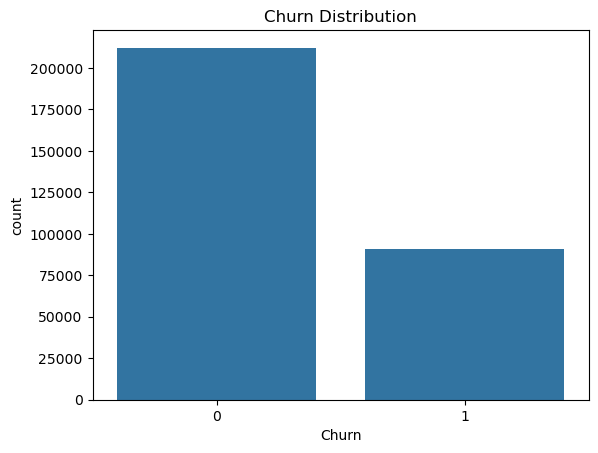

Churn
0    0.700001
1    0.299999
Name: proportion, dtype: float64

In [14]:
sns.countplot(x='Churn', data=train_clean)
plt.title("Churn Distribution")
plt.show()

train_df['Churn'].value_counts(normalize=True)

In [15]:
categorical_cols = train_clean.select_dtypes(include=['object']).columns
numeric_cols = train_clean.select_dtypes(include=['int64', 'float64']).columns

print(categorical_cols)
print(numeric_cols)

Index(['Gender', 'Subscription Type', 'Contract Length', 'Customer Status'], dtype='object')
Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


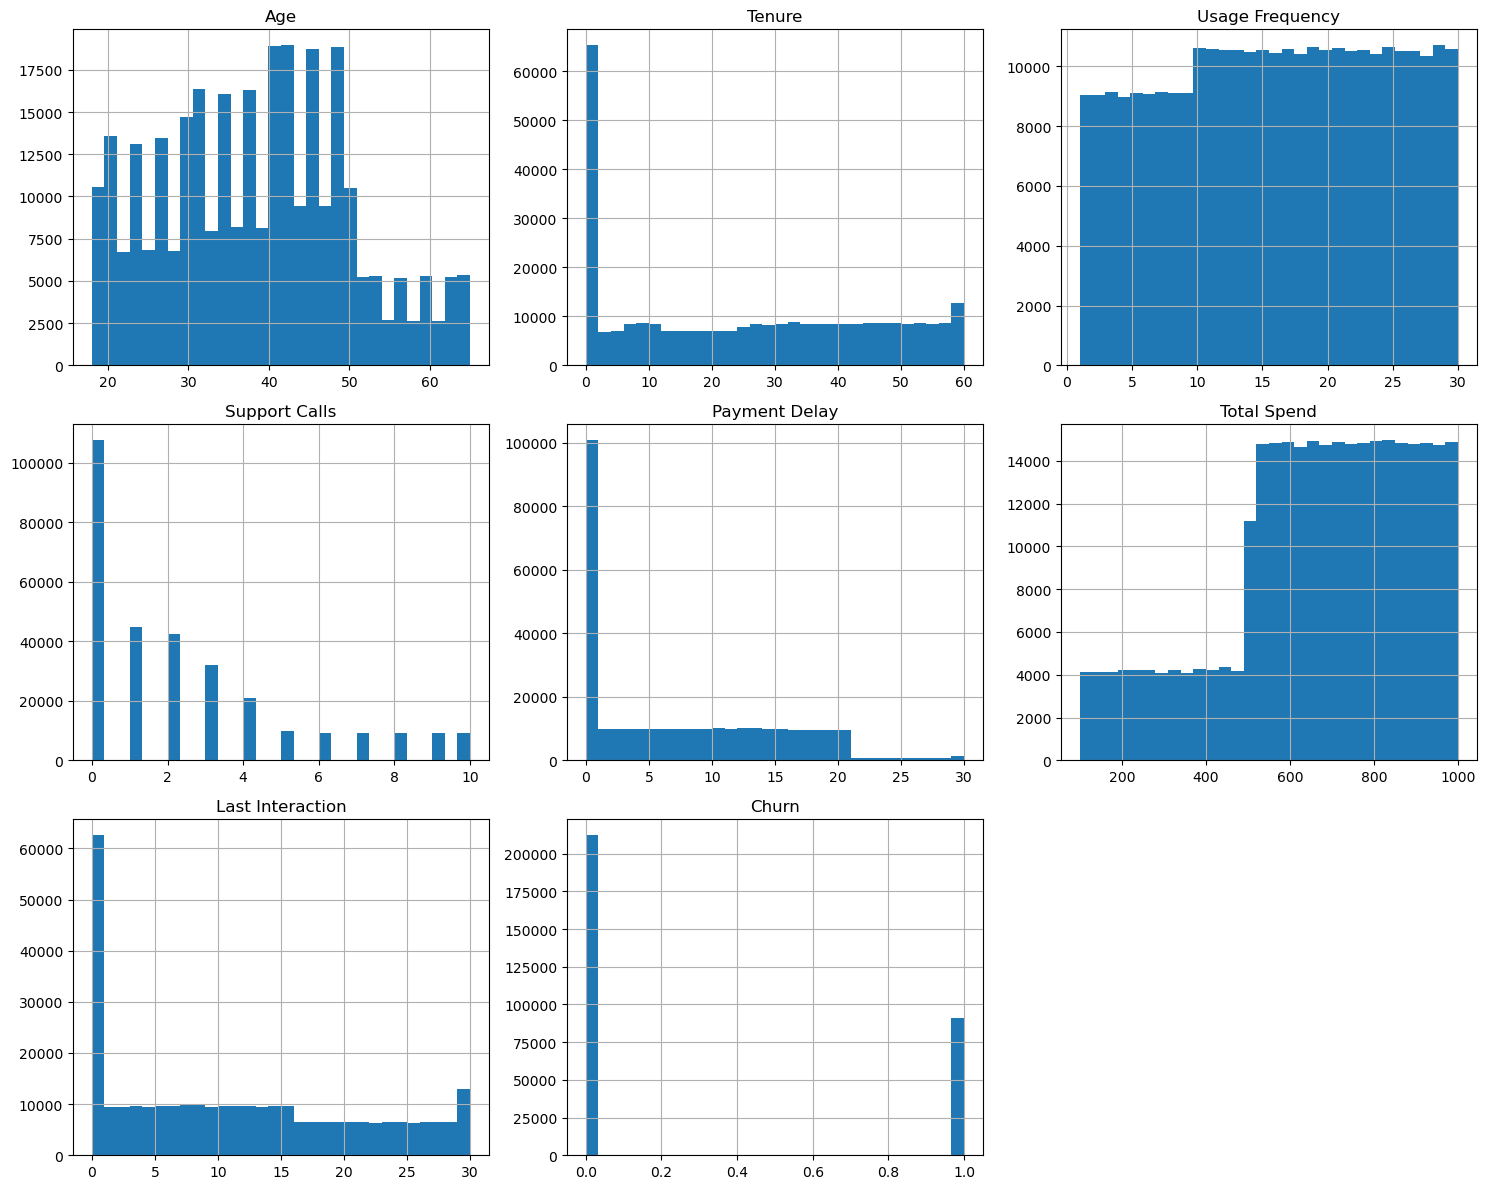

In [16]:
train_clean[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

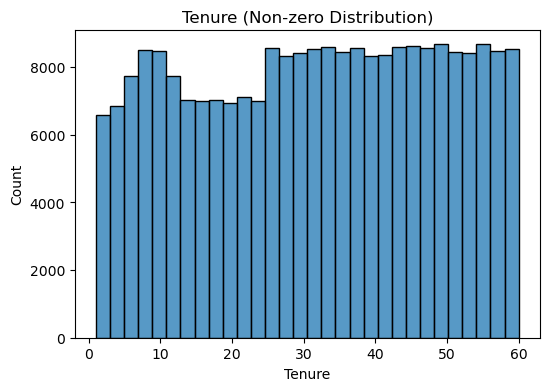

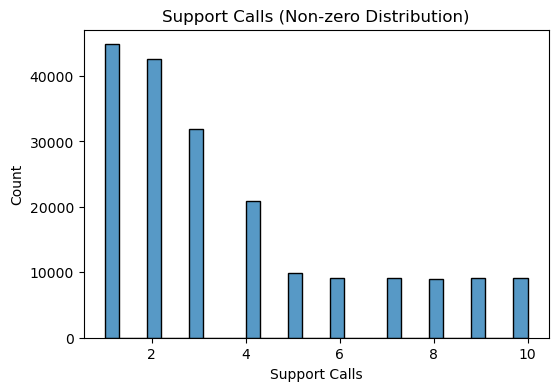

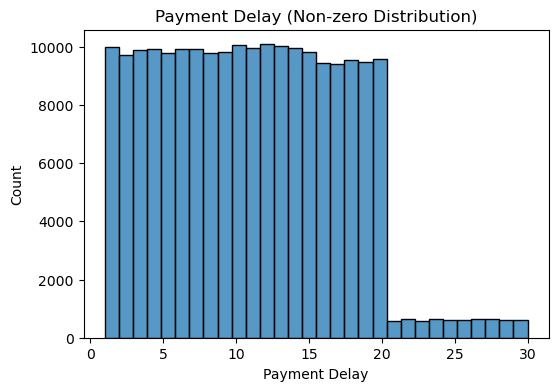

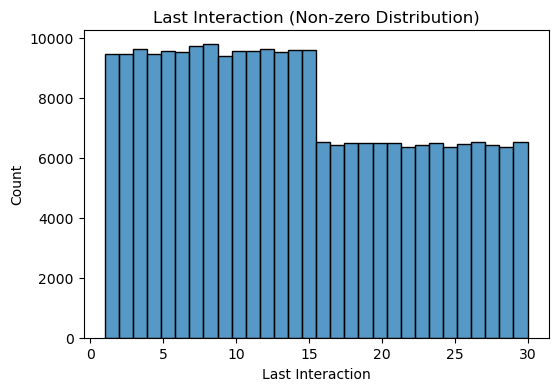

In [17]:
for col in ["Tenure", "Support Calls", "Payment Delay", "Last Interaction"]:
    plt.figure(figsize=(6,4))
    sns.histplot(train_clean[train_clean[col] > 0][col], bins=30)
    plt.title(f"{col} (Non-zero Distribution)")
    plt.show()


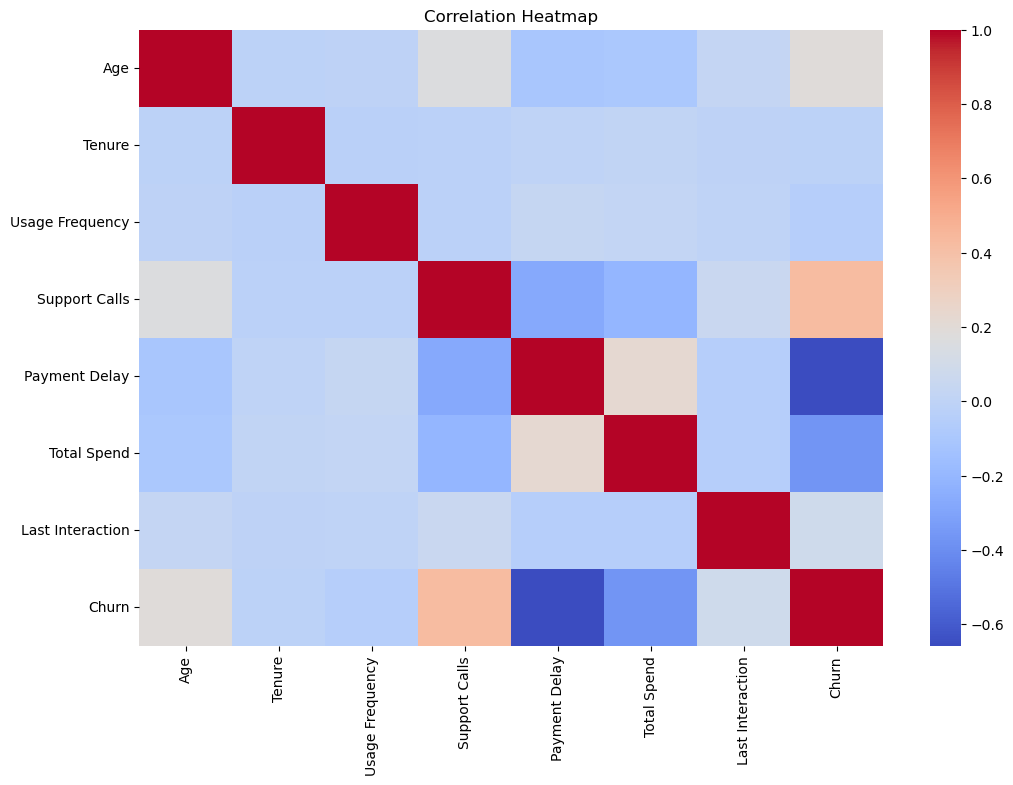

Churn               1.000000
Support Calls       0.424620
Age                 0.189481
Last Interaction    0.084337
Tenure             -0.015853
Usage Frequency    -0.049018
Total Spend        -0.372350
Payment Delay      -0.658225
Name: Churn, dtype: float64

In [18]:
corr = train_clean[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
corr['Churn'].sort_values(ascending=False)

<Axes: >

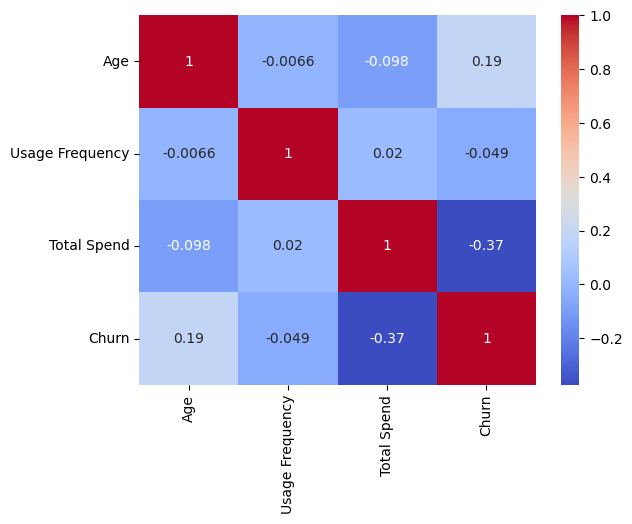

In [19]:
#Correlation heatmap without the zero-distorted columns
numeric_no_zero = ["Age", "Usage Frequency", "Total Spend"]
sns.heatmap(train_clean[numeric_no_zero + ["Churn"]].corr(), annot=True, cmap="coolwarm")


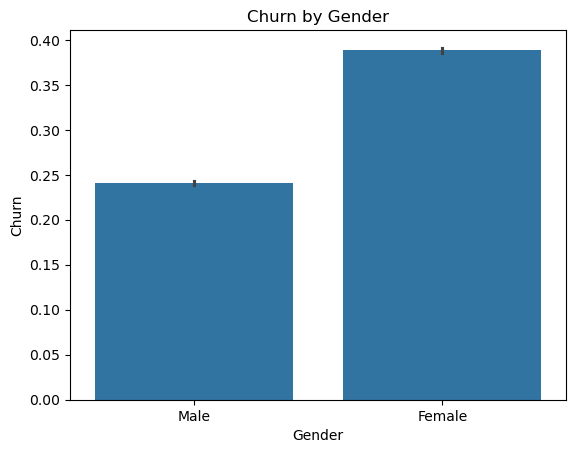

In [20]:
sns.barplot(x='Gender', y='Churn', data=train_clean)
plt.title("Churn by Gender")
plt.show()


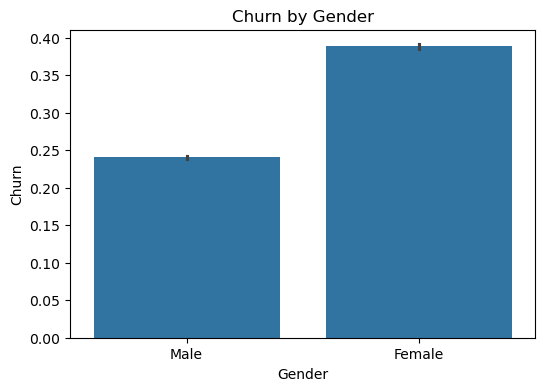

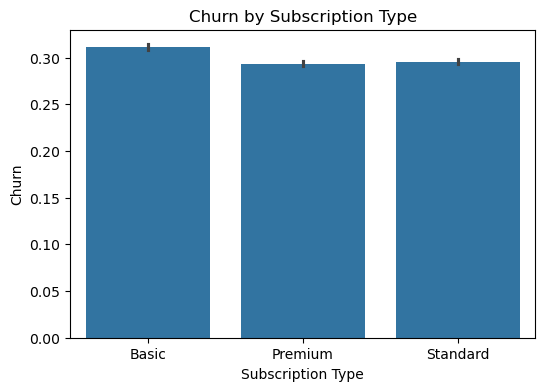

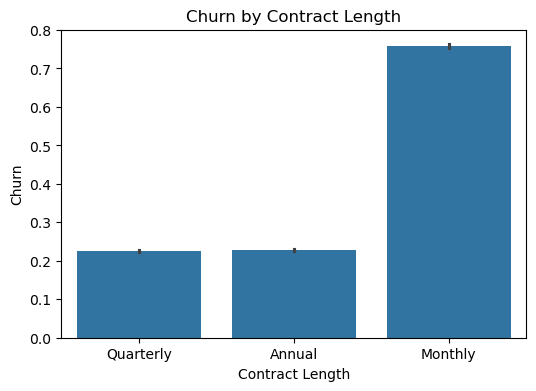

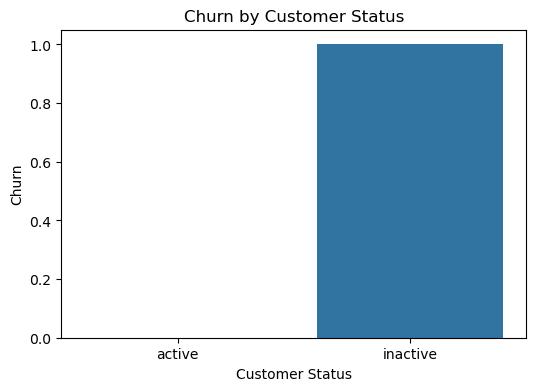

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn', data=train_clean)
    plt.title(f"Churn by {col}")
    plt.show()


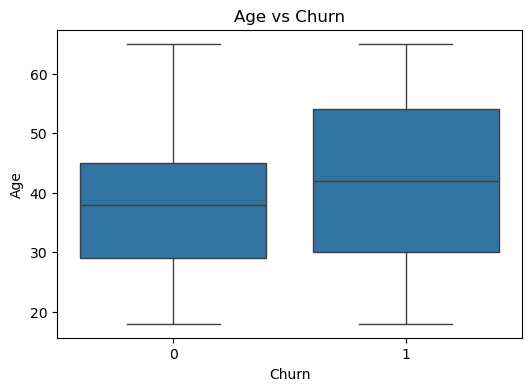

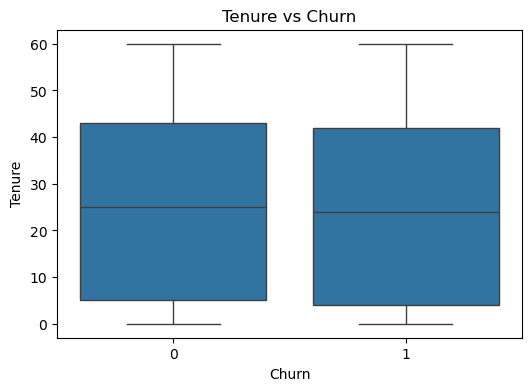

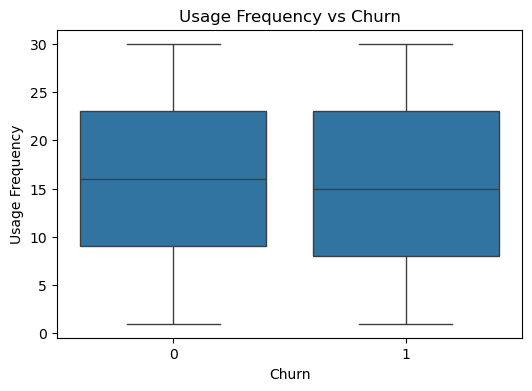

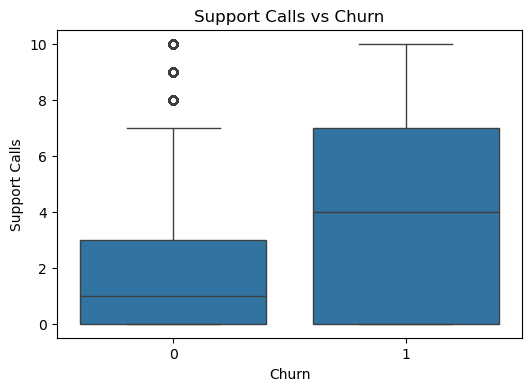

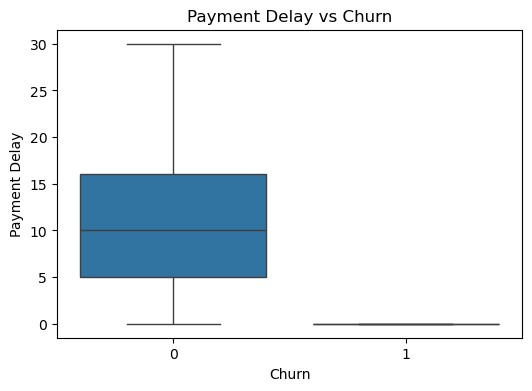

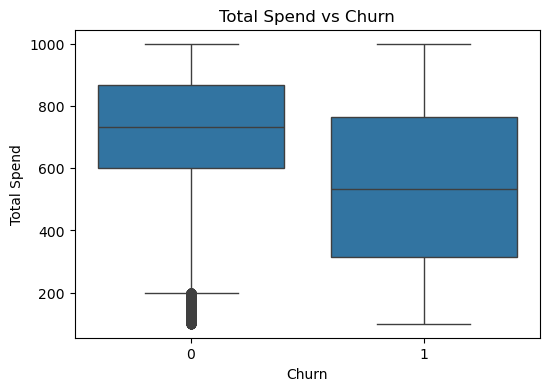

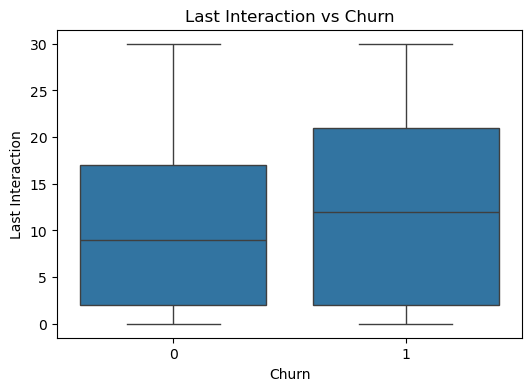

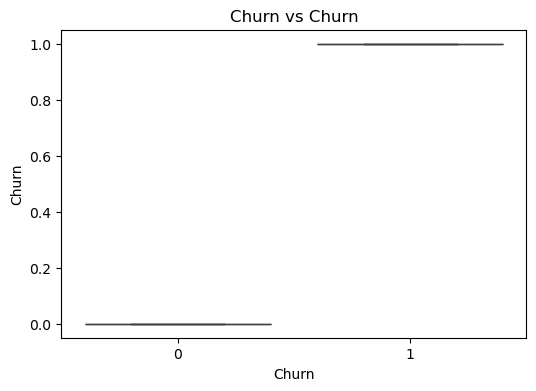

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=train_clean)
    plt.title(f"{col} vs Churn")
    plt.show()


Age
- Churned customers are older
- Distribution spreads are similar
- Moderate predictive power.

Tenure
- Differences are small
- Shorter tenure churns a bit more
- Tenure may matter, but not strongly.

Usage Frequency
- Very similar distributions
- Almost no difference
- Probably a weak predictor.

Support Calls
- Churned users have way more total support calls
- Non-churn users mostly have 0–2 calls

Payment Delay
- Churned users have Payment Delay ≈ 0
- Non-churn users have 5–15 days delay
- Tells us: Users who stop paying quickly churn, and users who continue paying have more variation in delay.

Total Spend
- Churned customers spend much less on average (Very strong predictor)

Last Interaction
- Churned customers had their last interaction longer ago (meaningful)

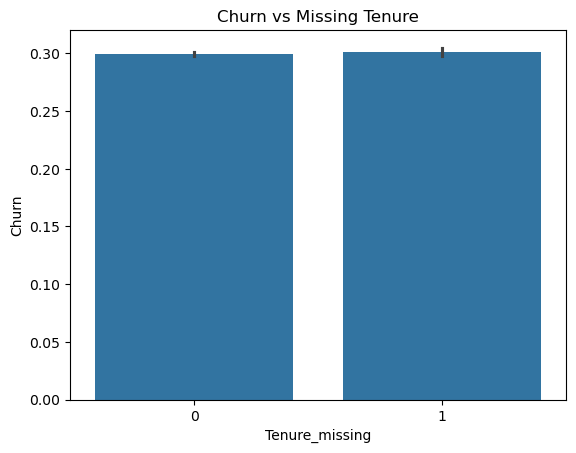

In [23]:
for col in ["Tenure", "Support Calls", "Payment Delay", "Last Interaction"]:
    train_clean[col + "_missing"] = (train_df[col].isna()).astype(int)

sns.barplot(x="Tenure_missing", y="Churn", data=train_clean)
plt.title("Churn vs Missing Tenure")
plt.show()

#this graph tells me that missing tenure does not meaningfully predict churn.

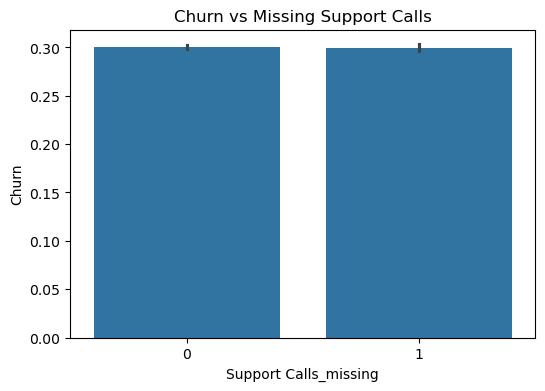

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x="Support Calls_missing", y="Churn", data=train_clean)
plt.title("Churn vs Missing Support Calls")
plt.show()

#missing Support Calls does not predict churn.

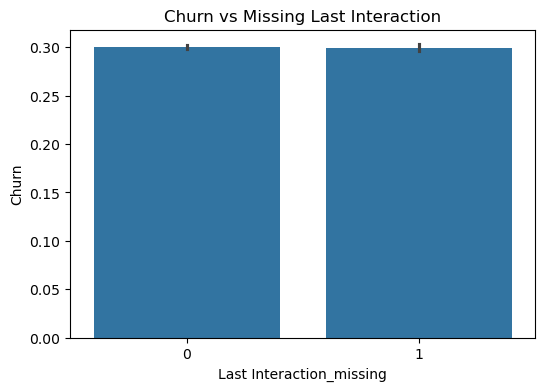

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x="Last Interaction_missing", y="Churn", data=train_clean)
plt.title("Churn vs Missing Last Interaction")
plt.show()

#Missing Last Interaction does not predict churn.

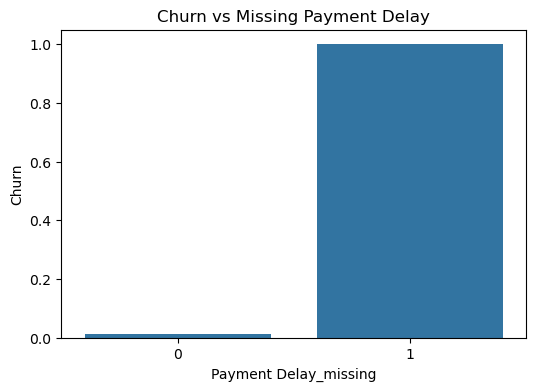

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x="Payment Delay_missing", y="Churn", data=train_clean)
plt.title("Churn vs Missing Payment Delay")
plt.show()



Every customer with a missing Payment Delay churned.

Payment Delay missing probably means: 
- The customer has already stopped paying → so they churn by definition.

Key Takeways From Data Visualtion
- age has a small postive correlation with churn (older users churn more)
- total spend has a neg corr with churn (lower spenders churn more)
- usage frequence has a near-zero correlation

Churn by Contract Length
- Monthly users churn the most (0.75)
- Annual / Quarterly users churn far less (~0.22)

Churn by Customer Status
- Active = almost zero churn
- Inactive = 100% churn

Churn by Subscription Type
- Slight differences but not huge
- Basic churns a little more than Premium/Standard

## Saving cleaned dataset

In [28]:
numeric_cols = ["Age", "Tenure", "Usage Frequency", "Support Calls", "Payment Delay", "Total Spend", "Last Interaction"]

for col in numeric_cols:
    train_clean[col] = pd.to_numeric(train_clean[col], errors="coerce")

train_clean[numeric_cols] = train_clean[numeric_cols].fillna(0)

In [29]:
train_clean.to_csv("../data/processed/train_clean.csv", index=False)

In [30]:
file_path = "../data/raw/test.csv"
test_df = pd.read_csv(file_path)

test_df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
Tenure               27198
Usage Frequency          0
Support Calls        27538
Payment Delay            0
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     27195
Last Due Date            0
Last Payment Date        0
Customer Status          0
dtype: int64

In [31]:
test_clean = test_df.copy()

for col in numeric_cols:
    test_clean[col] = pd.to_numeric(test_clean[col], errors="coerce")


In [32]:
test_clean.to_csv("../data/processed/test_clean.csv", index=False)